In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
pd.set_option('display.max_columns', 100)

In [2]:
columns = ['symboling', 'normalized-losses', 'make', 'fuel-type', 'aspiration', 'num-of-doors', 'body-style', 
        'drive-wheels', 'engine-location', 'wheel-base', 'length', 'width', 'height', 'curb-weight', 'engine-type', 
        'num-of-cylinders', 'engine-size', 'fuel-system', 'bore', 'stroke', 'compression-rate', 'horsepower', 'peak-rpm', 'city-mpg', 'highway-mpg', 'price']
cars = pd.read_csv("imports-85.data", names=columns)

In [3]:
cars.head()

,symboling,normalized-losses,make,fuel-type,aspiration,num-of-doors,body-style,drive-wheels,engine-location,wheel-base,length,width,height,curb-weight,engine-type,num-of-cylinders,engine-size,fuel-system,bore,stroke,compression-rate,horsepower,peak-rpm,city-mpg,highway-mpg,price
0,3,?,alfa-romero,gas,std,two,convertible,rwd,front,88.6,168.8,64.1,48.8,2548,dohc,four,130,mpfi,3.47,2.68,9.0,111,5000,21,27,13495
1,3,?,alfa-romero,gas,std,two,convertible,rwd,front,88.6,168.8,64.1,48.8,2548,dohc,four,130,mpfi,3.47,2.68,9.0,111,5000,21,27,16500
2,1,?,alfa-romero,gas,std,two,hatchback,rwd,front,94.5,171.2,65.5,52.4,2823,ohcv,six,152,mpfi,2.68,3.47,9.0,154,5000,19,26,16500
3,2,164,audi,gas,std,four,sedan,fwd,front,99.8,176.6,66.2,54.3,2337,ohc,four,109,mpfi,3.19,3.40,10.0,102,5500,24,30,13950
4,2,164,audi,gas,std,four,sedan,4wd,front,99.4,176.6,66.4,54.3,2824,ohc,five,136,mpfi,3.19,3.40,8.0,115,5500,18,22,17450


We only need continuous numerical values

In [4]:
continuous_vars =['normalized-losses', 'wheel-base', 'length', 'width', 'height', 'curb-weight', 'bore', 'stroke', 'compression-rate', 'horsepower', 'peak-rpm', 'city-mpg', 'highway-mpg', 'price']

In [5]:
#Filtering continuous cols
num_cars = cars[continuous_vars]
num_cars.head()

,normalized-losses,wheel-base,length,width,height,curb-weight,bore,stroke,compression-rate,horsepower,peak-rpm,city-mpg,highway-mpg,price
0,?,88.6,168.8,64.1,48.8,2548,3.47,2.68,9.0,111,5000,21,27,13495
1,?,88.6,168.8,64.1,48.8,2548,3.47,2.68,9.0,111,5000,21,27,16500
2,?,94.5,171.2,65.5,52.4,2823,2.68,3.47,9.0,154,5000,19,26,16500
3,164,99.8,176.6,66.2,54.3,2337,3.19,3.40,10.0,102,5500,24,30,13950
4,164,99.4,176.6,66.4,54.3,2824,3.19,3.40,8.0,115,5500,18,22,17450


## Preprocessing

The normalized-losses column has "?" values, and so we need to change it to null.

In [6]:
#replacing values
num_cars = num_cars.replace("?", np.nan)

In [7]:
num_cars.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 205 entries, 0 to 204
Data columns (total 14 columns):
normalized-losses    164 non-null object
wheel-base           205 non-null float64
length               205 non-null float64
width                205 non-null float64
height               205 non-null float64
curb-weight          205 non-null int64
bore                 201 non-null object
stroke               201 non-null object
compression-rate     205 non-null float64
horsepower           203 non-null object
peak-rpm             203 non-null object
city-mpg             205 non-null int64
highway-mpg          205 non-null int64
price                201 non-null object
dtypes: float64(5), int64(3), object(6)
memory usage: 22.5+ KB


Some column types are set as objects. We need to turn them into int or float

In [8]:
num_cars = num_cars.astype(float)

In [9]:
#Looking for null values
num_cars.isnull().sum()

normalized-losses    41
wheel-base            0
length                0
width                 0
height                0
curb-weight           0
bore                  4
stroke                4
compression-rate      0
horsepower            2
peak-rpm              2
city-mpg              0
highway-mpg           0
price                 4
dtype: int64

There are 41 missing values in the "normalized-losses" column after replacing value and converting to float.

There a re few other columns with null values; however, we are only interested in the "price" column because that is our label we are trying to predict.


In [10]:
#dropping na values in price
num_cars = num_cars.dropna(subset=['price'])
num_cars.isnull().sum()

normalized-losses    37
wheel-base            0
length                0
width                 0
height                0
curb-weight           0
bore                  4
stroke                4
compression-rate      0
horsepower            2
peak-rpm              2
city-mpg              0
highway-mpg           0
price                 0
dtype: int64

In [11]:
#Filling null values with mean of other columns
num_cars = num_cars.fillna(num_cars.mean())

In [12]:
#Any null values after fillna?
num_cars.isnull().any().sum()

0

**Normalizing values**

In [13]:
#Retaining price column (output)
price_col = num_cars['price']
#normal - min / max - min
normalized_cars = (num_cars - num_cars.min())/ (num_cars.max() - num_cars.min())
normalized_cars["price"] = price_col
normalized_cars.head(3)

,normalized-losses,wheel-base,length,width,height,curb-weight,bore,stroke,compression-rate,horsepower,peak-rpm,city-mpg,highway-mpg,price
0,0.298429,0.058309,0.413433,0.324786,0.083333,0.411171,0.664286,0.290476,0.125,0.294393,0.346939,0.222222,0.289474,13495.0
1,0.298429,0.058309,0.413433,0.324786,0.083333,0.411171,0.664286,0.290476,0.125,0.294393,0.346939,0.222222,0.289474,16500.0
2,0.298429,0.230321,0.449254,0.444444,0.383333,0.517843,0.100000,0.666667,0.125,0.495327,0.346939,0.166667,0.263158,16500.0


## Univariate KNN model

In [14]:
from sklearn.neighbors import KNeighborsRegressor
from sklearn.metrics import mean_squared_error

In [15]:
#Function takes in parameter, target, and dataframe. It finds the RMSE
def knn_train_test(parameter, target, df):
    #Shuffle index
    shuffled_index = np.random.permutation(df.index)
    random_df = df.reindex(shuffled_index)
    #Find half data len
    half_index = int(len(random_df)/2)
    train = random_df.iloc[0:half_index]
    test = random_df.iloc[half_index:]
    #fitting model
    knn = KNeighborsRegressor()
    knn.fit(train[[parameter]], train[target])
    predict = knn.predict(test[[parameter]])
    mse = mean_squared_error(predict, test[target])
    rmse = mse ** (1/2)
    return rmse

In [16]:
#Finding parameters / label
columns = normalized_cars.columns.drop("price")
aggregated_rmse = {}

In [17]:
#Finding RMSE per column 
for col in columns: 
    rmse = knn_train_test(col, "price", normalized_cars)
    aggregated_rmse[col] = rmse

In [18]:
aggregated_rmse_series = pd.Series(aggregated_rmse).sort_values()
aggregated_rmse_series

horsepower           3469.430960
highway-mpg          3504.314697
city-mpg             4464.806230
width                4554.840829
curb-weight          4639.521451
length               4697.694731
wheel-base           4889.444332
compression-rate     5922.528643
bore                 7180.274723
normalized-losses    7692.073441
height               7865.292122
stroke               7945.251201
peak-rpm             8637.435873
dtype: float64

**KNN using different values of K**

In [19]:
#Function takes in parameter, target, and dataframe. It finds the RMSE
def knn_train_test_k(parameter, target, df):
    #Shuffle index
    shuffled_index = np.random.permutation(df.index)
    random_df = df.reindex(shuffled_index)
    #Find half data len
    half_index = int(len(random_df)/2)
    train = random_df.iloc[0:half_index]
    test = random_df.iloc[half_index:]
    #fitting model
    k_values = [1,3,5,7,9]
    rmse_k = {}
    for k in k_values:
        knn = KNeighborsRegressor(n_neighbors=k)
        knn.fit(train[[parameter]], train[target])
        predict = knn.predict(test[[parameter]])
        mse = mean_squared_error(predict, test[target])
        rmse = mse ** (1/2)
        rmse_k[k] = rmse
    return rmse_k

In [20]:
#Finding parameters / label
columns = normalized_cars.columns.drop("price")
aggregated_rmse = {}

In [21]:
#Finding RMSE per column 
for col in columns: 
    rmse = knn_train_test_k(col, "price", normalized_cars)
    aggregated_rmse[col] = rmse

In [22]:
import matplotlib.pyplot as plt
%matplotlib inline

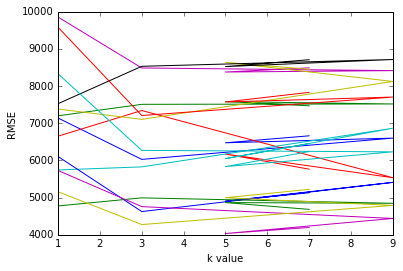

In [23]:
for k,v in aggregated_rmse.items():
    x = list(v.keys())
    y = list(v.values())
    
    plt.plot(x,y)
    plt.xlabel('k value')
    plt.ylabel('RMSE')

## Multivariate Model

In [26]:
feature_avg_rmse = {}
for k,v in aggregated_rmse.items():
    avg_rmse = np.mean(list(v.values()))
    feature_avg_rmse[k] = avg_rmse
series_avg_rmse = pd.Series(feature_avg_rmse)
series_avg_rmse.sort_values()

curb-weight          4631.306112
highway-mpg          4832.966739
horsepower           4888.249177
city-mpg             5234.594747
width                6186.575854
length               6292.420226
compression-rate     6579.532784
bore                 6579.963771
wheel-base           7454.472728
normalized-losses    7938.066484
peak-rpm             7977.399706
stroke               8399.130146
height               8723.063621
dtype: float64

In [27]:
def knn_train_test(train_cols, target, df):
    np.random.seed(1)
    #randomize
    shuffled_index = np.random.permutation(df.index)
    rand_df = df.reindex(shuffled_index)
    #divide df in half
    last_train_row = int(len(rand_df) / 2)
    #partition
    train_df = rand_df.iloc[0:last_train_row]
    test_df = rand_df.iloc[last_train_row:]
    
    k_values = [5]
    k_rmses = {}
    
    for k in k_values:
        #fit
        knn = KNeighborsRegressor(n_neighbors=k)
        knn.fit(train_df[train_cols], train_df[target])
        #predict
        predicted = knn.predict(test_df[train_cols])
        #rmse
        mse = mean_squared_error(test_df[target], predicted)
        rmse = np.sqrt(mse)
        
        k_rmses[k] = rmse
    return k_rmses

In [29]:
k_rmse_results = {}
two_best_features = ['horsepower', 'width']
rmse_val = knn_train_test(two_best_features, 'price', num_cars)
k_rmse_results["two best features"] = rmse_val

three_best_features = ['horsepower', 'width', 'curb-weight']
rmse_val = knn_train_test(three_best_features, 'price', num_cars)
k_rmse_results["three best features"] = rmse_val

four_best_features = ['horsepower', 'width', 'curb-weight', 'city-mpg']
rmse_val = knn_train_test(four_best_features, 'price', num_cars)
k_rmse_results["four best features"] = rmse_val

five_best_features = ['horsepower', 'width', 'curb-weight' , 'city-mpg' , 'highway-mpg']
rmse_val = knn_train_test(five_best_features, 'price', num_cars)
k_rmse_results["five best features"] = rmse_val

six_best_features = ['horsepower', 'width', 'curb-weight' , 'city-mpg' , 'highway-mpg', 'length']
rmse_val = knn_train_test(six_best_features, 'price', num_cars)
k_rmse_results["six best features"] = rmse_val

In [30]:
k_rmse_results

{'five best features': {5: 4010.545922593048},
 'four best features': {5: 4010.4497757189724},
 'six best features': {5: 4005.179084808336},
 'three best features': {5: 4009.975326261712},
 'two best features': {5: 3800.4843868972157}}

In [34]:
def knn_train_test(train_cols, target, df):
    np.random.seed(1)
    #randomize
    shuffled_index = np.random.permutation(df.index)
    rand_df = df.reindex(shuffled_index)
    #divide df
    last_train_row = int(len(rand_df) / 2)
    #partition
    train_df = rand_df.iloc[0:last_train_row]
    test_df = rand_df.iloc[last_train_row:]
    
    k_values = [i for i in range(1,25)]
    k_rmses = {}
    
    for k in k_values:
        #fit
        knn = KNeighborsRegressor(n_neighbors=k)
        knn.fit(train_df[train_cols], train_df[target])
        #predict
        predict = knn.predict(test_df[train_cols])
        #rmse
        mse = mean_squared_error(test_df[target], predict)
        rmse = np.sqrt(mse)
        k_rmses[k] = rmse
    return k_rmses

In [35]:
k_rmse_results = {}
three_best_features = ['horsepower', 'width', 'curb-weight']
rmse_val = knn_train_test(three_best_features, 'price', num_cars)
k_rmse_results["three best features"] = rmse_val

four_best_features = ['horsepower', 'width', 'curb-weight', 'city-mpg']
rmse_val = knn_train_test(four_best_features, 'price', num_cars)
k_rmse_results["four best features"] = rmse_val

five_best_features = ['horsepower', 'width', 'curb-weight' , 'city-mpg' , 'highway-mpg']
rmse_val = knn_train_test(five_best_features, 'price', num_cars)
k_rmse_results["five best features"] = rmse_val

k_rmse_results

{'five best features': {1: 4509.369164021254,
  2: 4343.787075345728,
  3: 3977.908680003432,
  4: 4073.0060103559927,
  5: 4010.545922593048,
  6: 3987.8602144425763,
  7: 4093.0095425958834,
  8: 4238.820406831077,
  9: 4484.825609250113,
  10: 4481.4456288077845,
  11: 4645.992428140296,
  12: 4713.149464427942,
  13: 4846.147190169392,
  14: 4921.527752488946,
  15: 4961.846318840718,
  16: 4968.41938290733,
  17: 5026.37286915812,
  18: 5108.385955720972,
  19: 5127.20528283338,
  20: 5196.747817959358,
  21: 5195.586291147344,
  22: 5153.478102302993,
  23: 5211.86110505511,
  24: 5206.698186708858},
 'four best features': {1: 4516.337252488771,
  2: 4319.991335192539,
  3: 3980.1625695828093,
  4: 4082.4237203589614,
  5: 4010.4497757189724,
  6: 3986.886120535525,
  7: 4093.056621668392,
  8: 4238.534846513756,
  9: 4484.702837182365,
  10: 4478.98496533567,
  11: 4645.8214443615125,
  12: 4712.928993467835,
  13: 4846.28781744001,
  14: 4929.191594537765,
  15: 4961.8463188407

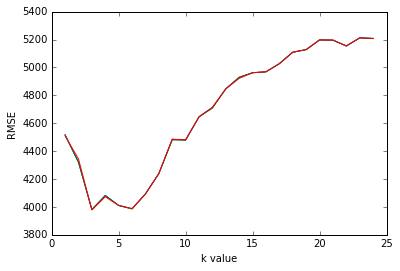

In [36]:
for k,v in k_rmse_results.items():
    x = list(v.keys())
    y = list(v.values())
    
    plt.plot(x,y)
    plt.xlabel('k value')
    plt.ylabel('RMSE')